In [1]:
from scipy.optimize import minimize
import sys
sys.path.append('../gefera')
import gefera as gf

import matplotlib.pyplot as plt

In [25]:
a1 = 124.7 * ac.R_sun.value / ac.au.value
t1 = 16.57
e1 = 0.00001
p1 = 130.194
w1 = 90.0 * np.pi / 180
i1 = 89.92 * np.pi / 180

a2 = 61.5 * ac.R_sun.value / ac.au.value
t2 = 12.41
e2 = 0.00001
p2 = 45.154
w2 = 0.1 * np.pi / 180
om2 = 150 * np.pi / 180
i2 = 89.78 * np.pi / 180

u1 = 0.5
u2 = 0.3
r1 = 0.1
r2 = 0.07

o1 = gf.PrimaryOrbit(a1, t1, e1, p1, w1, i1)
o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
sys = gf.ConfocalSystem(o1, o2)

t = np.linspace(1513.5, 1514.1, 1000)
lc = sys.lightcurve(t, u1, u2, r1, r2, grad=True)
bp, bpm, theta, dbp, dbpm, dtheta = sys.impacts(t, grad=True)

y = lc[0] + np.random.randn(len(t)) * 0.001

In [56]:
grad = lc[1]
np.array(sorted(grad.items()), dtype=np.ndarray)[:, 1]

array([array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
               0

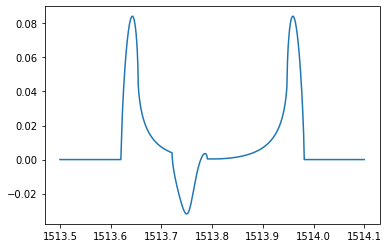

In [3]:
mu, jac = sys.lightcurve(t, u1, u2, r1, r2, grad=True)
plt.plot(t, jac['a1'])

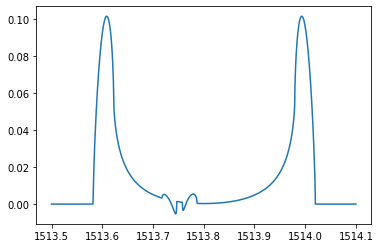

In [14]:
s = 0.001
x = np.linspace(a1-0.1, a1+0.1, 10)
dldx = np.zeros((len(x), len(t)))

for i in range(len(x)):
    o1 = gf.PrimaryOrbit(x[i], t1, e1, p1, w1, i1)
    o2 = gf.ConfocalOrbit(a2, t2, e2, p2, om2, w2, i2)
    sys = gf.ConfocalSystem(o1, o2)
    mu, jac = sys.lightcurve(t, u1, u2, r1, r2, grad=True)
    #jac = np.array(list(jac.values()))
    dldx[i, :] = jac['a1']

plt.plot(t, dldx.T[:, 0], '-');
#plt.xlim(1513.6, 1513.7)
#plt.ylim(-0.01, 0.001)

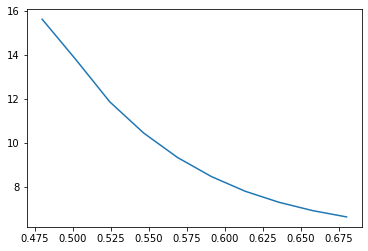

In [15]:
jac = np.sum(dldx, axis=1)
plt.plot(x, jac)

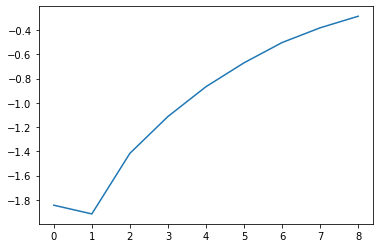

In [16]:
plt.plot(np.diff(jac))